## The script to verify folder structures and file types

In [1]:
import openslide
print(openslide.__version__)


1.3.1


In [2]:
import openslide

def try_open_ndpi(file_path):
    try:
        slide = openslide.OpenSlide(file_path)
        print(f"Successfully opened {file_path}. Dimensions: {slide.dimensions}")
        slide.close()
    except Exception as e:
        print(f"Failed to open {file_path}: {str(e)}")

# Replace '/path/to/your/file.ndpi' with the path to an actual .ndpi file
try_open_ndpi('/n/data2/hms/dbmi/kyu/lab/gw90/datasets/AUS/images/Image_ALF0005.ome.tif')
#try_open_ndpi('/n/data2/hms/dbmi/kyu/lab/bok448/datasets/SKCM-Stage-1-2/downloads/1_StageInII_Melanoma_BWHScaner/BD2021_00016877.ndpi')


Successfully opened /n/data2/hms/dbmi/kyu/lab/gw90/datasets/AUS/images/Image_ALF0005.ome.tif. Dimensions: (235191, 127966)


In [2]:
!pip install tifffile

In [4]:
!pip install imagecodecs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 MB 17.4 MB/s eta 0:00:0000:0100:01m


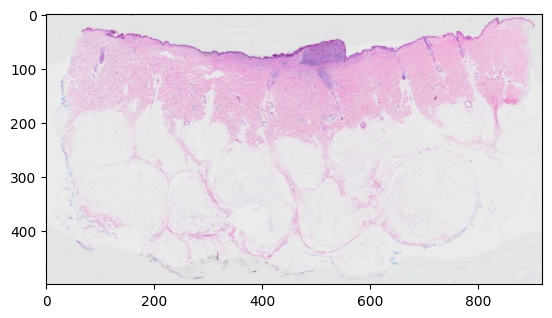

In [1]:
import tifffile as tf
import matplotlib.pyplot as plt

file_path = '/n/data2/hms/dbmi/kyu/lab/gw90/datasets/AUS/images/Image_ALF0005.ome.tif'

with tf.TiffFile(file_path) as tif:
    # Read only the first series or a specific level if it's a pyramidal file
    series = tif.series[0]  # Adjust the index based on which part you want to read
    if series.levels:
        # If there are multiple resolution levels available, choose a lower resolution
        image = series.levels[-1].asarray()
    else:
        image = series.asarray()

plt.imshow(image)
plt.show()


In [2]:
import h5py

def read_h5_file(file_path):
    with h5py.File(file_path, 'r') as file:
        print("Keys in the file:", list(file.keys()))
        coords = file['coords'][:]
        patch_size = file['coords'].attrs['patch_size']
        original_path = file['coords'].attrs['path']
        print("Coordinates:", coords)
        print("Patch Size:", patch_size)
        print("Original Path:", original_path)

# Example usage
file_path = '/n/scratch/users/i/idu675/MGB_coords/1_StageInII_Melanoma_BWHScaner/patch_coord/BD2021_00016804.h5'
read_h5_file(file_path)


Keys in the file: ['coords']
Coordinates: [[  1792  19712]
 [  2688  16128]
 [  3584   6272]
 ...
 [135296  27776]
 [138880  20608]
 [145024  16128]]
Patch Size: 896
Original Path: /n/data2/hms/dbmi/kyu/lab/bok448/datasets/SKCM-Stage-1-2/downloads/1_StageInII_Melanoma_BWHScaner/BD2021_00016804.ndpi


In [2]:
import torch
print(torch.__version__)


2.4.0+cu121


In [3]:
import timm
print(timm.__version__)

0.9.8


In [28]:
import openslide
import logging

In [38]:
import h5py

file = h5py.File('/n/scratch/users/i/idu675/AUS_coords/patch_coord/Image_ALF0423.h5', 'r')  # Open the file in read-only mode
#file =  h5py.File('/n/scratch/users/i/idu675/MGB_coords/1_StageInII_Melanoma_BWHScaner/patch_coord/BD2021_00016804.h5', 'r') 
                  
def print_name(name):
    print(name)

file.visit(print_name)  # Visit all objects in H5 file, print their names
#file.close()


coords


In [39]:
print('Data Type:', file['coords'].dtype)
print('Shape:', file['coords'].shape)


Data Type: int64
Shape: (301, 2)


In [40]:
data = file['coords'][:]  # Read the entire dataset into memory
print(data)


[[  448  2688]
 [  448  5376]
 [  448  5824]
 [  448  6272]
 [  448  6720]
 [  896  1792]
 [  896  2688]
 [  896  5824]
 [  896  6272]
 [  896  6720]
 [ 1344   896]
 [ 1344  5376]
 [ 1344  5824]
 [ 1344  6272]
 [ 1344  6720]
 [ 1344  7168]
 [ 1792   448]
 [ 1792   896]
 [ 1792  4032]
 [ 1792  4480]
 [ 1792  4928]
 [ 1792  5376]
 [ 1792  5824]
 [ 1792  6272]
 [ 1792  6720]
 [ 1792  7168]
 [ 1792  7392]
 [ 2240  1344]
 [ 2240  1792]
 [ 2240  3136]
 [ 2240  3584]
 [ 2240  4032]
 [ 2240  4480]
 [ 2240  4928]
 [ 2240  5376]
 [ 2240  5824]
 [ 2240  6272]
 [ 2240  6720]
 [ 2240  7168]
 [ 2240  7392]
 [ 2688     0]
 [ 2688   448]
 [ 2688  2688]
 [ 2688  3136]
 [ 2688  3584]
 [ 2688  4032]
 [ 2688  4480]
 [ 2688  4928]
 [ 2688  5376]
 [ 2688  5824]
 [ 2688  6272]
 [ 2688  6720]
 [ 2688  7168]
 [ 2688  7392]
 [ 3136     0]
 [ 3136   448]
 [ 3136  2688]
 [ 3136  3136]
 [ 3136  3584]
 [ 3136  4032]
 [ 3136  4480]
 [ 3136  4928]
 [ 3136  5376]
 [ 3136  5824]
 [ 3136  6272]
 [ 3136  6720]
 [ 3136  7

In [35]:
wsi_file = file['coords'].attrs['path']
print(wsi_file)
wsi = openslide.OpenSlide(wsi_file)
data = file['coords'][()]
c = data.shape[0]
print(f"Extracting {c} patches from WSI file: {wsi_file}")

/n/data2/hms/dbmi/kyu/lab/gw90/datasets/AUS/images/Image_ALF0003.ome.tif
Extracting 167 patches from WSI file: /n/data2/hms/dbmi/kyu/lab/gw90/datasets/AUS/images/Image_ALF0003.ome.tif


In [36]:
import h5py
import os

def is_hdf5_file(filename):
    try:
        with h5py.File(filename, 'r') as file:
            # Attempt to access an attribute or dataset to trigger potential errors
            keys = list(file.keys())
            return True, keys  # Return True if successful along with the keys to confirm file content
    except Exception as e:
        return False, str(e)  # Return False and the error message if an error occurs

directory_path = '/n/scratch/users/i/idu675/AUS_coords/patch_coord'  # Directory containing HDF5 files
corrupt_files = {}

# Loop through each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith(".h5"):  # Check only HDF5 files
        file_path = os.path.join(directory_path, filename)
        is_valid, result = is_hdf5_file(file_path)
        if not is_valid:
            corrupt_files[file_path] = result  # Store the corrupt file and error message

# Print out the results
if corrupt_files:
    print("Corrupt files found:")
    for file, error in corrupt_files.items():
        print(f"{file}: {error}")
else:
    print("No corrupt files found.")


No corrupt files found.


In [37]:
import h5py

def check_hdf5_contents(file_path):
    try:
        with h5py.File(file_path, 'r') as file:
            print("Keys in the file:", list(file.keys()))
            for key in file.keys():
                try:
                    data = file[key][:]
                    print(f"Successfully read data from {key}: {data.shape}")
                except Exception as e:
                    print(f"Failed to read {key}: {e}")
    except Exception as e:
        print(f"Failed to open file {file_path}: {e}")

file_path = '/n/scratch/users/i/idu675/AUS_coords/patch_coord/Image_ALF0001.h5'
check_hdf5_contents(file_path)


Keys in the file: ['coords']
Successfully read data from coords: (167, 2)
